In [ ]:
# 把LAMOST星表和权威星表对照，找出对应光谱编号

In [2]:
import pandas as pd

# 读取CSV文件
aa_df = pd.read_csv('E:\\Download\\dr11_v1.0_MRS_stellar.csv')
bb_df = pd.read_csv('E:\\Download\\新建文件夹\\星表.csv')

# 提取bb.csv中“Gaia”列的值，并存储到一个集合中
gaia_values_set = set(bb_df['Gaia'].values)

# 找到aa.csv中“gaia_source_id”列的值在集合中的行
matched_rows = aa_df[aa_df['gaia_source_id'].isin(gaia_values_set)]

# 将匹配的行保存到cc.csv
matched_rows.to_csv('DR11中所有的在权威星表里的中分辨率红巨星.csv', index=False)

In [1]:
# 下载光谱

In [13]:
import pandas as pd
from pylamost import lamost
import csv
import time
lm=lamost(token='Fe8ade5e08d',dataset=11, version=1.0)
# 读取CSV文件
starid = pd.read_csv('DR11中所有的在权威星表里的红巨星.csv')
ls=starid['obsid']

for i in ls:
    i=str(i)
    data = lm.getFitsCsv(obsid=i,ismed=True)
    with open('midResSpectrum\\'+i+'.csv', 'w', newline='') as csvfile:
        csvfile.write(data)
    time.sleep(0.1)


In [48]:
import pandas as pd
from pylamost import lamost
import csv
import time
import json
lm=lamost(token='Fe8ade5e08d',dataset=11, version=1.0)
# 读取CSV文件
starid = pd.read_csv('DR11中所有的在权威星表里的中分辨率红巨星.csv')
#ls=starid['obsid']
redflag=-1
blueflag=-1
fails=[]
for i in ls:
    redflag=-1
    blueflag=-1
    i=str(i)
    data = lm.getFitsCsv(obsid=i,ismed=True)
    json_obj = json.loads(data)
    for j in range(len(json_obj['spectrums'])):
        if json_obj['spectrums'][j]['extname']=="COADD_B":
            blueflag=j
        elif json_obj['spectrums'][j]['extname']=="COADD_R":
            redflag=j
        if blueflag>=0 and redflag>=0:
            break
    if blueflag>=0 and redflag>=0:
        with open('midResSpectrum\\'+i+'.csv', 'w', newline='') as csvfile:
            writedata=json_obj['spectrums'][blueflag]['data']+json_obj['spectrums'][redflag]['data']
            writer = csv.writer(csvfile)
            writer.writerows(writedata)
    else:
        fails.append(i)
    time.sleep(0.1)

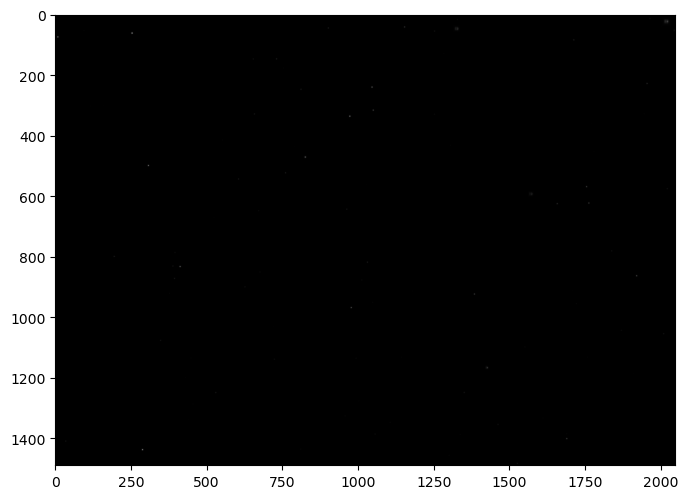

In [16]:
import urllib.request
import os

starid = pd.read_csv('DR11中所有的在权威星表里的中分辨率红巨星.csv')
ra=starid['ra']
dec = starid['dec']
ids=starid['obsid']
# 图片链接列表
save_dir='midPicture'
fails=[]
# 遍历图片链接并下载图片
for i in range(len(ra)):
    time.sleep(1)
    url='http://skyserver.sdss.org/dr17/SkyServerWS/ImgCutout/getjpeg?ra='+str(ra[i])+'&dec='+str(dec[i])+'&scale=0.08&height=512&width=512' 
    response = requests.get(url, stream=True)
    if response.status_code!=200:
        time.sleep(10)
        response = requests.get(url, stream=True)
        if response.status_code!=200:
            fails.append(ids[i])
            continue
    with open("Picture\\"+str(ids[i])+".jfif", 'wb') as f:
            for chunk in response.iter_content(1024):
                f.write(chunk)

# 写入失败数据
with open('fails.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for item in fails:
        file.write(str(item) + '\n')

In [22]:
import pandas as pd

# 读取CSV文件
aa_df = pd.read_csv("C:\\Users\\DELL'\\Downloads\\DR11中所有的在权威星表里的红巨星.csv")
bb_df = pd.read_csv("C:\\Users\\DELL'\\Downloads\\fails.csv")

# 提取bb.csv中“Gaia”列的值，并存储到一个集合中
gaia_values_set = set(bb_df['fails'].values)

# 找到aa.csv中“gaia_source_id”列的值在集合中的行
matched_rows = aa_df[~aa_df['obsid'].isin(gaia_values_set)]

# 将匹配的行保存到cc.csv
matched_rows.to_csv('dd.csv', index=False)

In [1]:
import pandas as pd

# 读取原始 CSV 文件
df = pd.read_csv('DR11中所有的在权威星表里的有图片的无重复红巨星.csv')

# 选择需要的列并计算平均值
avg_cols = [ 'snrg', 'snrr', 'snri', 'snrz']
df['avg'] = df[avg_cols].mean(axis=1)

# 筛选出平均值大于 10 的行
filtered_df = df[df['avg'] > 20]

# 保存到新的 CSV 文件
filtered_df.to_csv('DR11中所有的在权威星表里的有图片的20信噪比无重复红巨星.csv', index=False)

In [4]:
import pandas as pd
import shutil
import os

# 读取CSV文件
csv_file = 'DR11中所有的在权威星表里的有图片的20信噪比无重复红巨星.csv'
df = pd.read_csv(csv_file)

# 获取文件名列表
file_names = df['obsid'].tolist()

# 定义源文件夹和目标文件夹
source_folder = "C:\\Users\\DELL'\\Downloads\\Spectrum"
destination_folder = "C:\\Users\\DELL'\\Downloads\\lowresSpectrum"

# 确保目标文件夹存在
os.makedirs(destination_folder, exist_ok=True)

# 复制文件
for file_name in file_names:
    source_file = os.path.join(source_folder, str(file_name)+'.csv')
    destination_file = os.path.join(destination_folder,str(file_name)+'.csv')
    
    # 检查文件是否存在于源文件夹中
    if os.path.exists(source_file):
        shutil.copy(source_file, destination_file)
    else:
        print(f"File {source_file} does not exist")

print("All files copied successfully.")

All files copied successfully.


In [1]:
import os
from PIL import Image

# 设置输入和输出目录
input_dir = "C:\\Users\\DELL'\\Downloads\\Picture"
output_dir = "C:\\Users\\DELL'\\Downloads\\CutPicture"

# 创建输出目录(如果不存在)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
 # 获取图片的宽度和高度
width  = 512
height=512
        
        # 计算中心50*50像素区域的坐标
left = (width - 50) // 2
top = (height - 50) // 2
right = left + 50
bottom = top + 50
# 遍历输入目录中的所有图片文件
for filename in os.listdir(input_dir):
    if filename.endswith('.jfif'):
        # 打开图片
        img_path = os.path.join(input_dir, filename)
        img = Image.open(img_path)
        
       
        
        # 裁剪图片
        cropped_img = img.crop((left, top, right, bottom))
        
        # 保存裁剪后的图片
        output_path = os.path.join(output_dir, filename)
        cropped_img.save(output_path)

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100008131.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100010006.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100014068.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100014079.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100014088.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1000410242.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100103128.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100108131.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100110006.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100110023.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100112057.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100112138.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100113212.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\100114

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056310003.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056310047.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056310050.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056310076.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056310091.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056312170.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056313085.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056313204.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056313214.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056314080.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056314103.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056314136.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1056315042.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPi

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1111607220.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1111608052.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1111610224.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1111616059.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1111616077.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1111616199.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1113303075.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1113303096.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1113304171.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1113306159.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1113307013.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1113307019.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1113308073.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPi

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\132609005.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135204156.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135801053.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135801156.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135802010.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135802053.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135802127.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135803003.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135803082.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135804160.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135805050.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135805089.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\135805169.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1358051

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187504129.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187505037.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187505119.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187505200.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187505226.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187506024.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187506089.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187506152.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187507127.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187508202.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187509119.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\187509202.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\190407133.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\1904072

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\202813080.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\202813173.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\203011030.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\203013042.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\203013071.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\203013145.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\203014017.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\205211107.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\205212227.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\206806120.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\206806179.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\206814031.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\206814048.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\2085021

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229701143.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229701147.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229701158.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229701213.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229701218.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229701231.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229702014.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229702046.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229702048.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229702071.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229702102.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229704077.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\229704080.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\2297040

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215040.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215071.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215074.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215083.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215088.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215098.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215163.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215189.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215203.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215219.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254215223.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254216018.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\254216029.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\2542160

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314514097.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314514109.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314514112.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314514213.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314515027.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314515048.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314515058.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314515072.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314515100.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314515112.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314515115.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314515132.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\314515135.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\3145151

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\339812081.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\339812142.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\339814102.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\339814123.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\339815029.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\339815044.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\340005138.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\340005235.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\340007103.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\340503098.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\340508058.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\340509241.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\340510019.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\3405100

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379315065.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379315076.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379315081.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379315088.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379315221.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379315227.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379315244.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379316089.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379316141.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379316144.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379316185.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379316200.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\379316227.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\3793162

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399208037.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399208165.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399209023.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399209038.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399209059.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399209087.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399209089.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399209093.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399209120.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399209123.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399209165.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399210034.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\399210043.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\3992100

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406407007.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406407014.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406407042.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406407163.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406407248.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406408007.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406408076.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406408175.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406409241.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406410242.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406414076.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406414100.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\406414133.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\4064141

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414607088.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414607125.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414607143.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414607159.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414607187.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414607201.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414608025.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414608132.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414608180.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414608185.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414608191.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414608200.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\414609071.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\4146091

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\419110224.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420209044.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420211005.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420211008.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420211012.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420211034.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420211050.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420211057.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420211068.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420212056.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420215007.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420215051.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\420215079.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\4202150

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\431801182.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\431803090.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\431803153.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\431803225.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\431807087.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\431814065.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\431814151.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\431815062.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\431816119.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\432102051.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\432103010.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\432603240.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\432606045.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\4326080

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\442912070.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\442912232.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\442913005.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\442913012.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\442913202.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\442913210.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\442913236.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\445903045.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\445903122.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\445907156.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\445910178.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\445915235.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\445915244.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\4459161

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\563615141.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\563615182.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\567004122.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\567006245.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\567012184.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\571113176.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\572411040.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\572413048.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\572413248.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\601711217.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\602203201.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\602210120.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\602215094.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\6022151

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686002027.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686002077.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686002088.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686003098.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686003233.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686005119.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686005219.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686010041.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686010043.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686010067.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686010068.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686010073.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\686010089.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\6860100

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\75406060.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\75407242.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\75408189.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\75408207.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\75410070.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\75414010.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\75414046.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\75414168.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\75414235.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\758601009.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\758601011.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\758601044.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\758606151.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\758608018.jfif
S

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780803231.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780804014.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780804025.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780804029.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780804044.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780804114.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780804128.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780804189.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780804198.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780804207.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780805057.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780805086.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\780805150.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\7808051

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783706124.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783706154.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783706193.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783706224.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783706235.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783706245.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783707035.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783707061.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783707073.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783707184.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783707188.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783708030.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\783708156.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\7837081

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796305150.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796305190.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796305198.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796305229.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796306027.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796306043.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796306124.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796306154.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796306193.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796306245.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796307035.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796307061.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\796307073.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\7963071

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804809062.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804809176.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804809187.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804809189.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804809209.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804809229.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804809232.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804810157.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804810159.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804810173.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804810241.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804810249.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\804811023.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\8048121

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812401200.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402040.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402066.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402078.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402093.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402123.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402127.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402131.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402144.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402150.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402158.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402211.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\812402250.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\8124030

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\841601145.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\841605211.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\841606047.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\841606151.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\841606223.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\841608250.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\841610004.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\841611109.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\841616074.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\842605045.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\842605111.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\842606004.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\842614216.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\8426152

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874712025.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874712039.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874712160.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874712193.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874712208.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874713105.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874713121.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874713139.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874713161.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874713225.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874714182.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874714199.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\874714211.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\8747150

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891903092.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891903163.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891903171.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891903231.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891904014.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891904025.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891904029.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891904044.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891904114.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891904128.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891904236.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891905086.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\891905190.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\8919051

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94107103.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94303083.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94303250.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94306201.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94307097.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94307221.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94309060.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94309082.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94310220.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94312098.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94314041.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94314173.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94403035.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\94403083.jfif
Saved 

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960310003.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960310047.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960310050.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960310076.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960310091.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960310097.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960311023.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960312170.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960313138.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960313204.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960313214.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960314080.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\960314103.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\9603141

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\976406159.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\976407013.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\976407019.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\976408073.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\976408245.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\976414065.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\976416138.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\977801018.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\977802005.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\977802015.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\977802064.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\977804052.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\977805065.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\9778060

Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994207167.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994207174.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994207220.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994208023.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994208052.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994210226.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994216059.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994216077.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994216199.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994304177.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994310219.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\994410076.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\995605057.jfif
Saved cropped image: C:\Users\DELL'\Downloads\CutPicture\9956101

In [2]:
import os
import pandas as pd
import numpy as np

# 设定输入和输出文件夹
input_folder = 'cutMidResSpectrum'
output_folder = 'normalized_cutMidResSpectrum'

# 创建输出文件夹(如果不存在的话)
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 遍历input_folder下的所有文件
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        # 读取csv文件
        df = pd.read_csv(os.path.join(input_folder, filename), header=None)
        
        # 对数据进行归一化处理
        df_normalized = (df - df.min()) / (df.max() - df.min())
        
        # 保存处理后的数据到output_folder
        df_normalized.to_csv(os.path.join(output_folder, filename), index=False, header=False)

print('数据归一化处理完成!')

数据归一化处理完成!


In [5]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('label.csv')

# 创建一个空列表来存储每列的最大值和最小值
max_values = []
min_values = []

# 遍历除第一列以外的所有列
for column in df.columns[1:]:
    # 计算每列的最大值和最小值
    column_max = df[column].max()
    column_min = df[column].min()
    
    # 将最大值和最小值添加到对应的列表中
    max_values.append(column_max)
    min_values.append(column_min)
    
    # 对该列进行归一化
    df[column] = (df[column]-column_min)/(column_max-column_min)



# 将处理后的DataFrame保存为新的CSV文件
df.to_csv('normalized_label.csv', index=False)

In [6]:
max_values

[5542.0, 3.347, 0.3906, 3.462, 31.412]

In [7]:
min_values

[4215.0, 1.658, -2.3787, 0.346, 3.954]

In [3]:
import pandas as pd
import numpy as np

# 读取CSV文件
df = pd.read_csv('去重end_data.csv')

# 打乱数据顺序
df = df.sample(frac=1).reset_index(drop=True)

# 将数据分为5份
num_splits = 5
split_size = len(df) // num_splits
splits = [df.iloc[i*split_size:(i+1)*split_size] for i in range(num_splits)]

# 处理剩下的行，如果有的话
remainder = len(df) % num_splits
if remainder != 0:
    for i in range(remainder):
        splits[i] = pd.concat([splits[i], df.iloc[-(i+1):-(i+1)+1]], ignore_index=True)

# 保存每一份的"obsid"列
for i, split in enumerate(splits):
    split.to_csv(f'part_{i+1}_obsid.csv', index=False)

